In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/My Drive/Rimac Hackathon/data/Data Limpia Josue/EPS_PRESTACION_2022.csv'
# load csv
df = pd.read_csv(path)
df

,EPS,NRODOCUMENTO_CRYPTO,SEXO_STR,FECHAINICIOPRESTACION,DEP,PROV,DIST,TOTAL_PAGADOSINIGV,EDAD,GrupoEnfermedad,NOMBRECIE10,PAIS
0,Otro,70D912FEFD17BE245512B5CD00D6703B24C13FD6,HOMBRE,2022-07-14,LORETO,UCAYALI,PADRE MARQUEZ,91.07,33,Enfermedades del aparato digestivo,Caries de la dentina,Peru
1,Otro,70D912FEFD17BE245512B5CD00D6703B24C13FD6,HOMBRE,2022-07-13,LORETO,UCAYALI,PADRE MARQUEZ,350.64,33,Enfermedades del aparato digestivo,Caries de la dentina,Peru
2,Otro,70D912FEFD17BE245512B5CD00D6703B24C13FD6,HOMBRE,2022-06-21,LORETO,UCAYALI,PADRE MARQUEZ,315.13,33,Enfermedades del sistema osteomuscular y del t...,Artritis reumatoide; no especificada,Peru
3,Otro,70D912FEFD17BE245512B5CD00D6703B24C13FD6,HOMBRE,2022-06-22,LORETO,UCAYALI,PADRE MARQUEZ,161.75,33,Enfermedades del sistema osteomuscular y del t...,Artritis reumatoide; no especificada,Peru
4,Otro,70D912FEFD17BE245512B5CD00D6703B24C13FD6,HOMBRE,2022-07-12,LORETO,UCAYALI,PADRE MARQUEZ,184.88,33,Enfermedades del aparato digestivo,Caries de la dentina,Peru
...,...,...,...,...,...,...,...,...,...,...,...,...
7287358,Otro,B046B80BEF6369B654BE7CC7FD2C0D97E12A4CAA,MUJER,2022-10-06,SAN MARTIN,TOCACHE,SANTA LUCIA,221.83,21,"Síntomas, signos y hallazgos anormales clínico...",Dolor pélvico y perineal,Peru
7287359,Otro,B046B80BEF6369B654BE7CC7FD2C0D97E12A4CAA,MUJER,2021-08-03,SAN MARTIN,TOCACHE,SANTA LUCIA,100.47,21,Enfermedades del aparato genitourinario,Hemorragia vaginal y uterina anormal; no espec...,Peru
7287360,Otro,8F75A1260D5E248F3BF383060FEF88FD3BA6FA44,MUJER,2022-10-18,SAN MARTIN,TOCACHE,SANTA LUCIA,158.12,29,Ciertas enfermedades infecciosas y parasitarias,Candidiasis de la vulva y de la vagina (N77.1*...,Peru
7287361,Otro,8F75A1260D5E248F3BF383060FEF88FD3BA6FA44,MUJER,2022-10-17,SAN MARTIN,TOCACHE,SANTA LUCIA,221.83,29,Enfermedades del aparato genitourinario,Enfermedad inflamatoria del cuello uterino,Peru


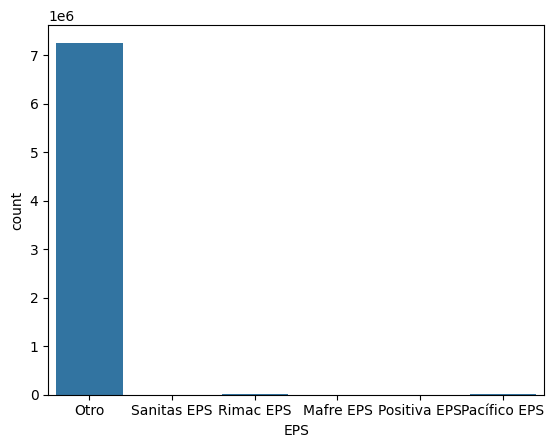

In [ ]:
# prompt: count plot of EPS column

import seaborn as sns

sns.countplot(x='EPS', data=df)
plt.show()


In [9]:
#change name of col NRODOCUMENTO_CRYPTO to dni_anon, FECHAINICIOPRESTACION to Fecha, SEXO_STR to SEXO
df.rename(columns={'NRODOCUMENTO_CRYPTO': 'dni_anon', 'FECHAINICIOPRESTACION': 'Fecha', 'SEXO_STR': 'SEXO'}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7287363 entries, 0 to 7287362
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   EPS                 object        
 1   dni_anon            object        
 2   SEXO                object        
 3   Fecha               datetime64[ns]
 4   DEP                 object        
 5   PROV                object        
 6   DIST                object        
 7   TOTAL_PAGADOSINIGV  float64       
 8   EDAD                int64         
 9   GrupoEnfermedad     object        
 10  NOMBRECIE10         object        
 11  PAIS                object        
 12  Mes                 period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), object(9), period[M](1)
memory usage: 722.8+ MB


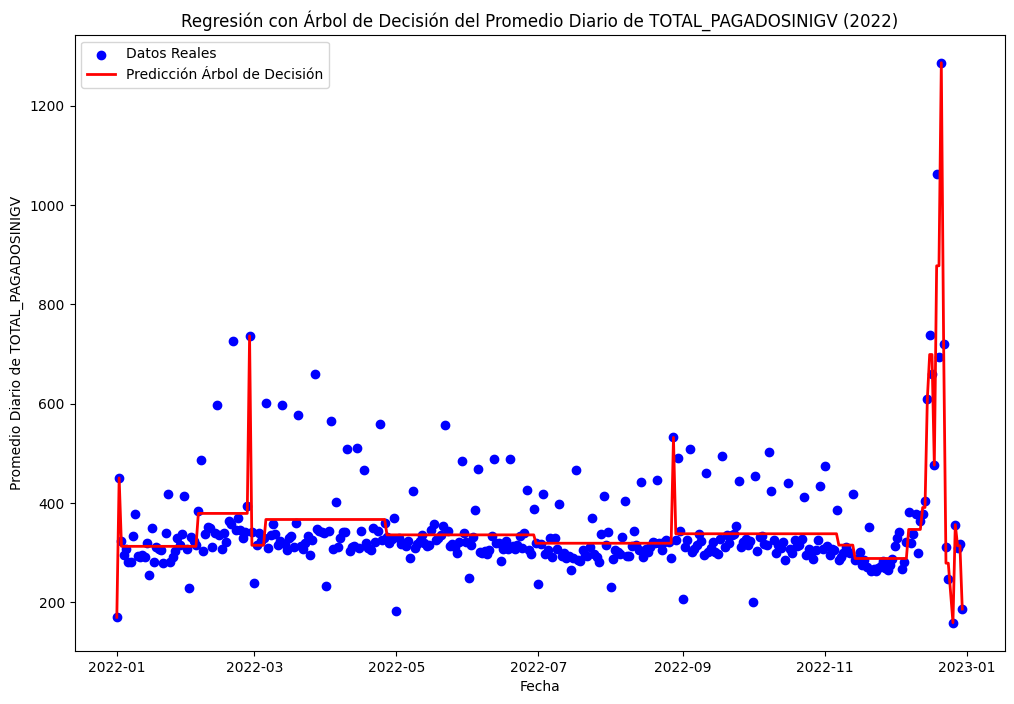

Error cuadrático medio (MSE): 3997.923105085788
Coeficiente de determinación (R^2): 0.6284833728752388


In [15]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Supongamos que df es tu DataFrame original
# Convertir la columna Fecha a datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Filtrar los datos para solo considerar el año 2022
df_2022 = df[df['Fecha'].dt.year == 2022]

# Agrupar por día y calcular el promedio o el total por día
df_agrupado_dia = df_2022.groupby(df_2022['Fecha'].dt.date)['TOTAL_PAGADOSINIGV'].agg(['mean', 'sum']).reset_index()

# Elegir la métrica deseada (promedio o total)
# En este ejemplo, usaremos el promedio
df_agrupado_dia.rename(columns={'mean': 'TOTAL_PAGADOSINIGV_PROM', 'sum': 'TOTAL_PAGADOSINIGV_TOTAL'}, inplace=True)

# Convertir la columna de fecha de nuevo a datetime
df_agrupado_dia['Fecha'] = pd.to_datetime(df_agrupado_dia['Fecha'])

# Para realizar la regresión, convertimos la fecha a un formato numérico
df_agrupado_dia['Fecha_Num'] = (df_agrupado_dia['Fecha'] - pd.to_datetime('1970-01-01')).dt.days

# Variables independientes (X) y dependientes (y)
X = df_agrupado_dia[['Fecha_Num']]
y = df_agrupado_dia['TOTAL_PAGADOSINIGV_PROM']

# Crear el modelo de regresión con Árbol de Decisión, limitando la profundidad del árbol
model = DecisionTreeRegressor(max_depth=5)  # Ajustar max_depth para suavizar la predicción
model.fit(X, y)

# Hacer predicciones
y_pred = model.predict(X)

# Visualización de la regresión con Árbol de Decisión
plt.figure(figsize=(12, 8))
plt.scatter(df_agrupado_dia['Fecha'], y, color='blue', label='Datos Reales')
plt.plot(df_agrupado_dia['Fecha'], y_pred, color='red', linewidth=2, label='Predicción Árbol de Decisión')
plt.title('Regresión con Árbol de Decisión del Promedio Diario de TOTAL_PAGADOSINIGV (2022)')
plt.xlabel('Fecha')
plt.ylabel('Promedio Diario de TOTAL_PAGADOSINIGV')
plt.legend()
plt.show()

# Métricas de evaluación
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R^2): {r2}')




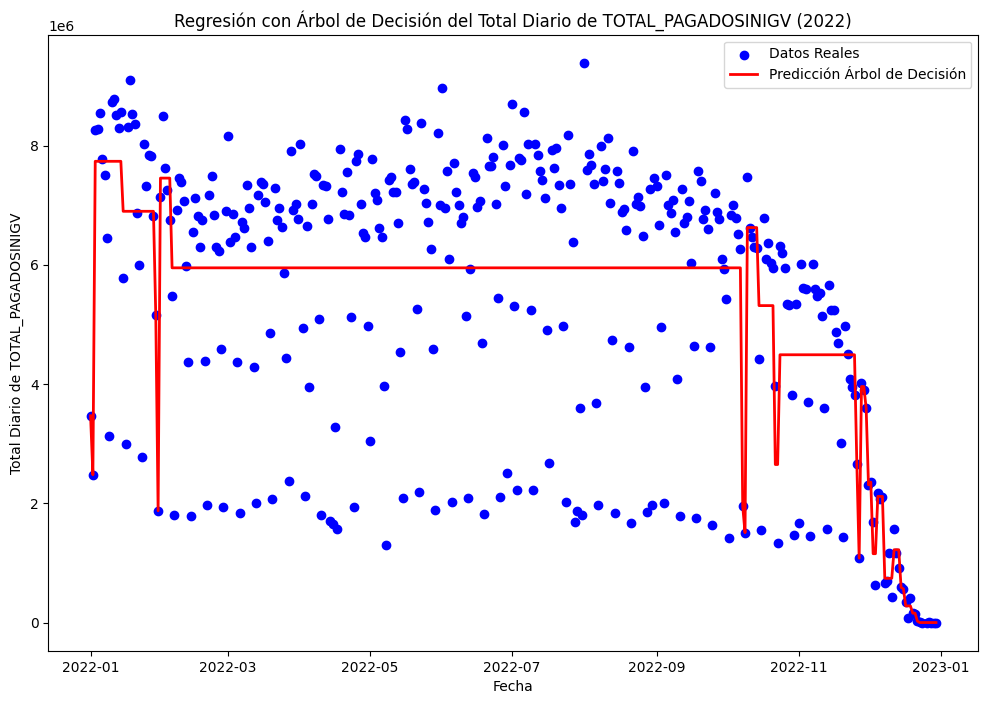

Error cuadrático medio (MSE): 3382793908689.7026
Coeficiente de determinación (R^2): 0.4403357277799623


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Supongamos que df es tu DataFrame original
# Convertir la columna Fecha a datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Filtrar los datos para solo considerar el año 2022
df_2022 = df[df['Fecha'].dt.year == 2022]

# Agrupar por día y calcular el total por día
df_agrupado_dia = df_2022.groupby(df_2022['Fecha'].dt.date)['TOTAL_PAGADOSINIGV'].agg(['sum']).reset_index()

# Renombrar columnas
df_agrupado_dia.rename(columns={'sum': 'TOTAL_PAGADOSINIGV_TOTAL'}, inplace=True)

# Convertir la columna de fecha de nuevo a datetime
df_agrupado_dia['Fecha'] = pd.to_datetime(df_agrupado_dia['Fecha'])

# Para realizar la regresión, convertimos la fecha a un formato numérico
df_agrupado_dia['Fecha_Num'] = (df_agrupado_dia['Fecha'] - pd.to_datetime('1970-01-01')).dt.days

# Variables independientes (X) y dependientes (y)
X = df_agrupado_dia[['Fecha_Num']]
y = df_agrupado_dia['TOTAL_PAGADOSINIGV_TOTAL']

# Crear el modelo de regresión con Árbol de Decisión, limitando la profundidad del árbol
model = DecisionTreeRegressor(max_depth=5)  # Ajustar max_depth para suavizar la predicción
model.fit(X, y)

# Hacer predicciones
y_pred = model.predict(X)

# Visualización de la regresión con Árbol de Decisión
plt.figure(figsize=(12, 8))
plt.scatter(df_agrupado_dia['Fecha'], y, color='blue', label='Datos Reales')
plt.plot(df_agrupado_dia['Fecha'], y_pred, color='red', linewidth=2, label='Predicción Árbol de Decisión')
plt.title('Regresión con Árbol de Decisión del Total Diario de TOTAL_PAGADOSINIGV (2022)')
plt.xlabel('Fecha')
plt.ylabel('Total Diario de TOTAL_PAGADOSINIGV')
plt.legend()
plt.show()

# Métricas de evaluación
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R^2): {r2}')


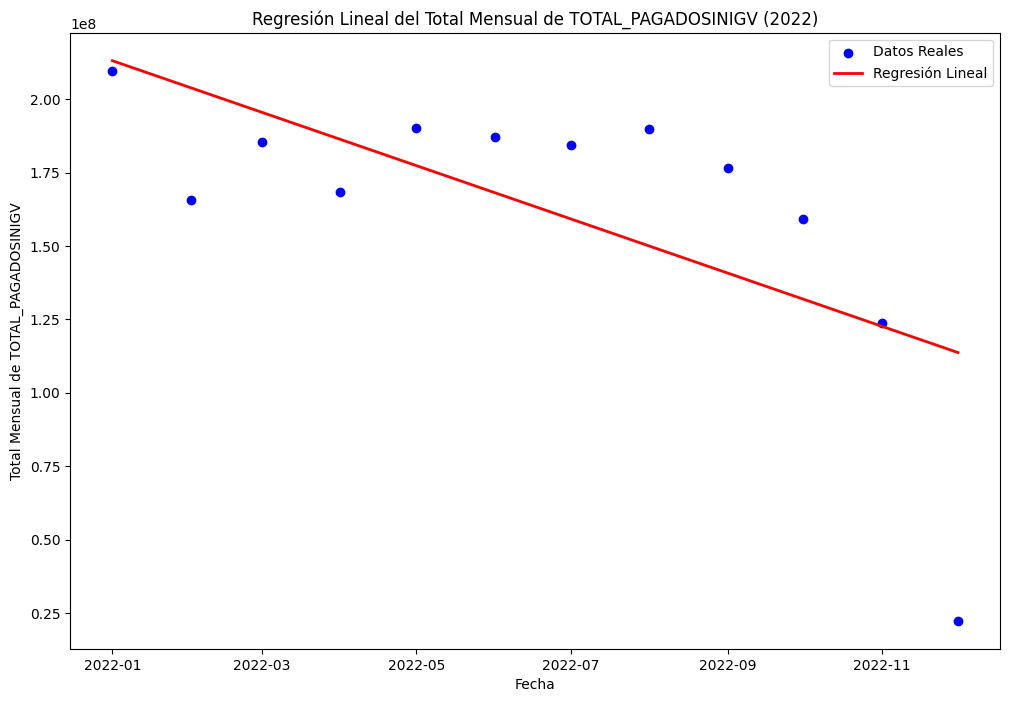

Error cuadrático medio (MSE): 1250553586569124.0
Coeficiente de determinación (R^2): 0.43842111378404225


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Supongamos que df es tu DataFrame original
# Convertir la columna Fecha a datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Filtrar los datos para solo considerar el año 2022
df_2022 = df[df['Fecha'].dt.year == 2022]

# Agrupar por mes y calcular el total por mes
df_agrupado_mes = df_2022.groupby(df_2022['Fecha'].dt.to_period('M'))['TOTAL_PAGADOSINIGV'].sum().reset_index()

# Convertir la columna de fecha a datetime
df_agrupado_mes['Fecha'] = df_agrupado_mes['Fecha'].dt.to_timestamp()

# Renombrar columnas
df_agrupado_mes.rename(columns={'TOTAL_PAGADOSINIGV': 'TOTAL_PAGADOSINIGV_TOTAL'}, inplace=True)

# Para realizar la regresión, convertimos la fecha a un formato numérico
df_agrupado_mes['Fecha_Num'] = (df_agrupado_mes['Fecha'] - pd.to_datetime('1970-01-01')).dt.days

# Variables independientes (X) y dependientes (y)
X = df_agrupado_mes[['Fecha_Num']]
y = df_agrupado_mes['TOTAL_PAGADOSINIGV_TOTAL']

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Hacer predicciones
y_pred = model.predict(X)

# Visualización de la regresión lineal
plt.figure(figsize=(12, 8))
plt.scatter(df_agrupado_mes['Fecha'], y, color='blue', label='Datos Reales')
plt.plot(df_agrupado_mes['Fecha'], y_pred, color='red', linewidth=2, label='Regresión Lineal')
plt.title('Regresión Lineal del Total Mensual de TOTAL_PAGADOSINIGV (2022)')
plt.xlabel('Fecha')
plt.ylabel('Total Mensual de TOTAL_PAGADOSINIGV')
plt.legend()
plt.show()

# Métricas de evaluación
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R^2): {r2}')


<Axes: xlabel='TOTAL_PAGADOSINIGV', ylabel='EDAD'>

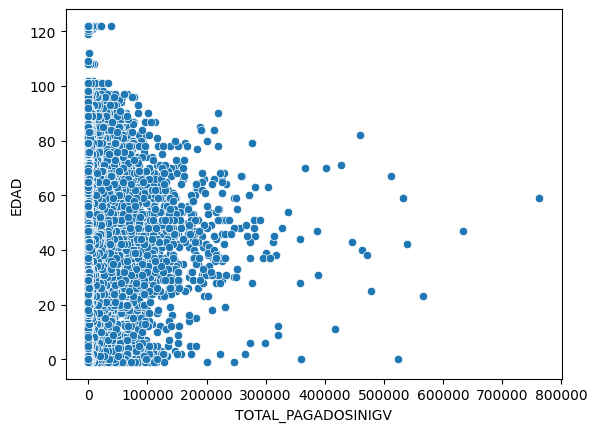

In [ ]:
# Scatterplot between TOTAL_PAGADOSINIGV and EDAD
# Only

sns.scatterplot(x='TOTAL_PAGADOSINIGV', y='EDAD', data=df)

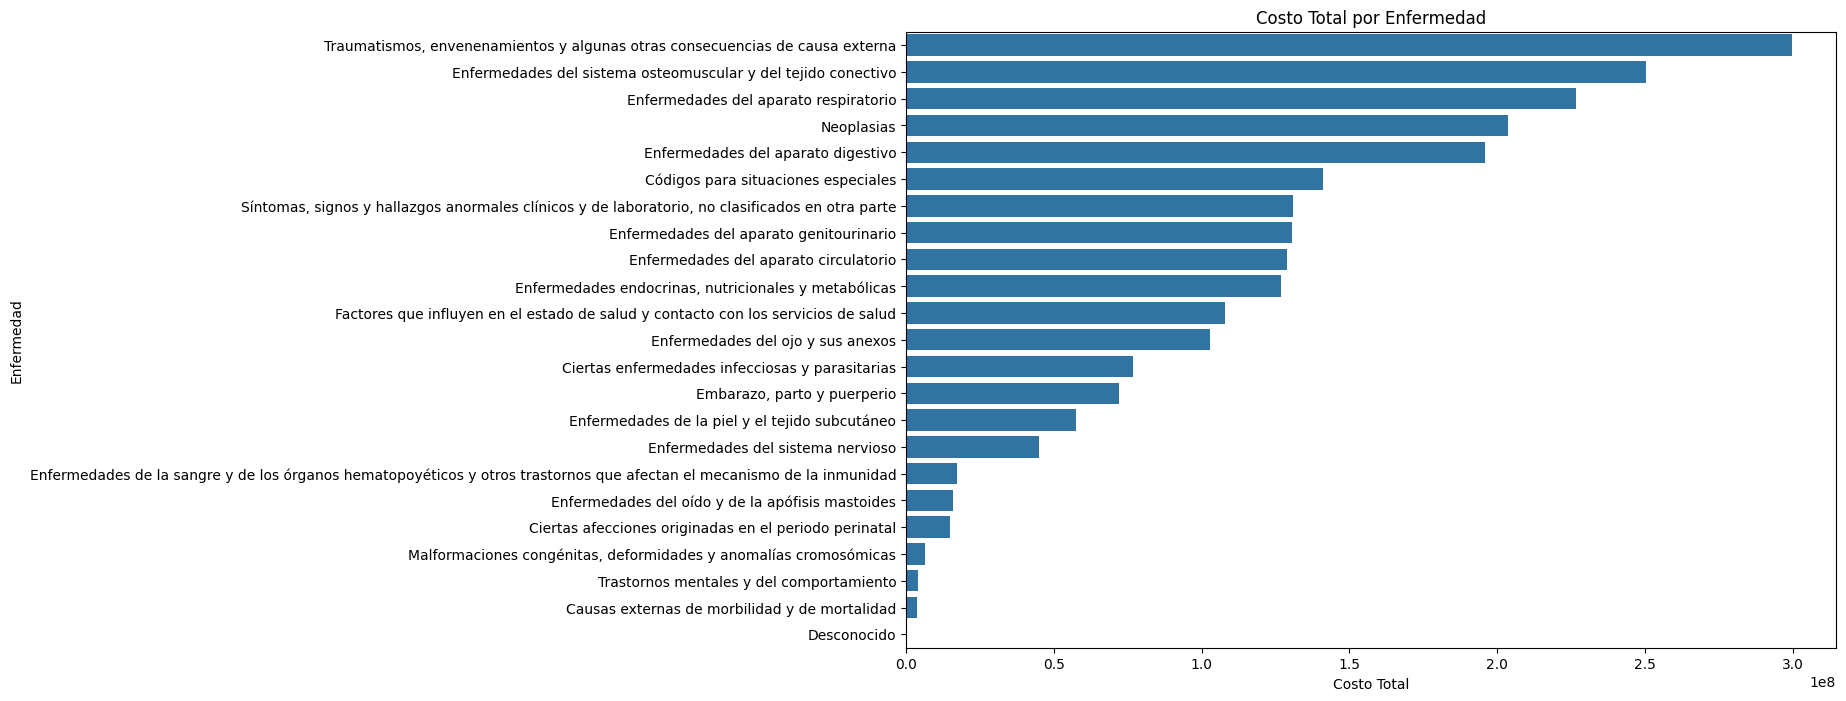

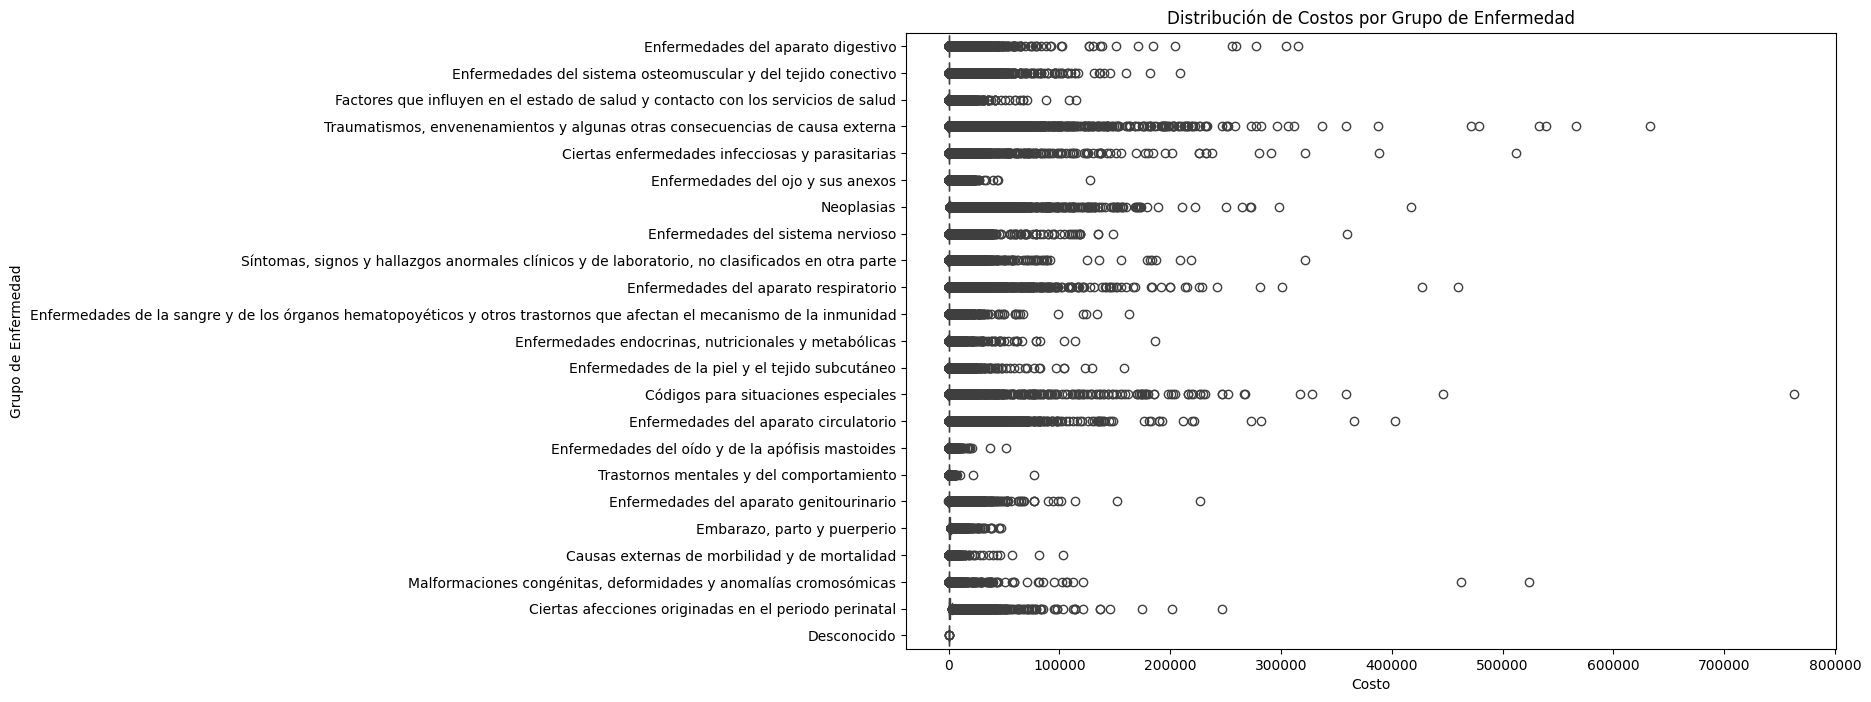

In [ ]:


# Agrupación por enfermedad y grupo de enfermedad
df_agrupado_enfermedad = df.groupby(['GrupoEnfermedad'])['TOTAL_PAGADOSINIGV'].agg(['sum', 'mean']).reset_index()

# Gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='sum', y='GrupoEnfermedad', data=df_agrupado_enfermedad.sort_values('sum', ascending=False))
plt.title('Costo Total por Enfermedad')
plt.xlabel('Costo Total')
plt.ylabel('Enfermedad')
plt.show()

# Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='TOTAL_PAGADOSINIGV', y='GrupoEnfermedad', data=df)
plt.title('Distribución de Costos por Grupo de Enfermedad')
plt.xlabel('Costo')
plt.ylabel('Grupo de Enfermedad')
plt.show()


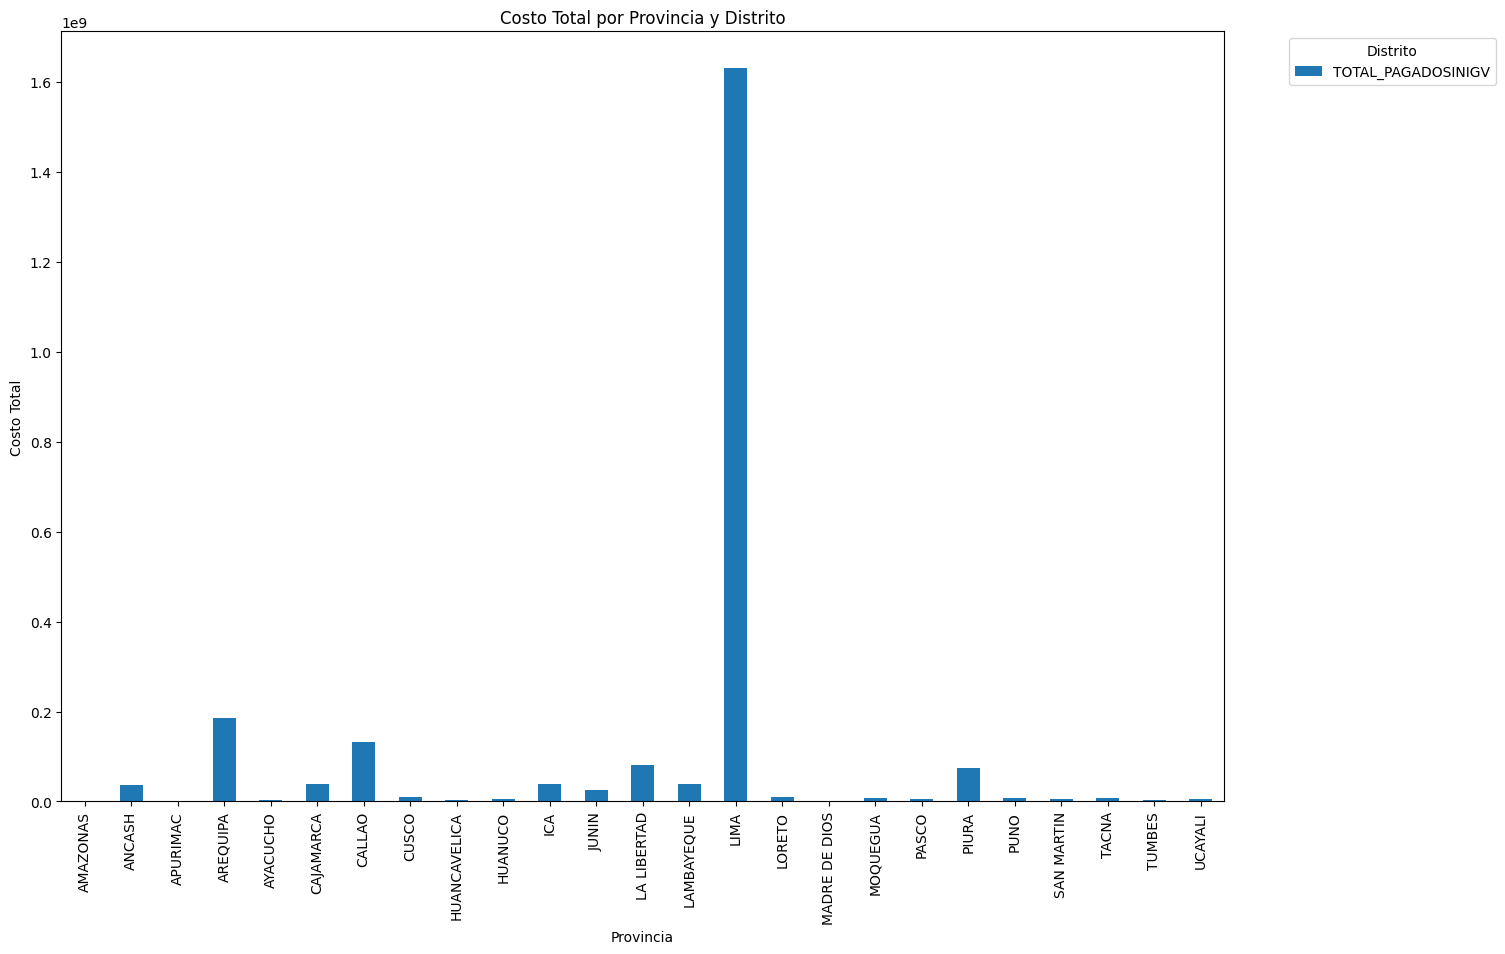

In [ ]:
# Agrupación por provincia y distrito
df_agrupado_prov_dist = df.groupby(['DEP'])['TOTAL_PAGADOSINIGV'].sum()

# Gráfico de barras apiladas por provincia y distrito
df_agrupado_prov_dist.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Costo Total por Provincia y Distrito')
plt.xlabel('Provincia')
plt.ylabel('Costo Total')
plt.legend(title='Distrito', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-19-1252a674dbcc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SEXO', y='sum', data=df_agrupado_sexo, palette='muted')


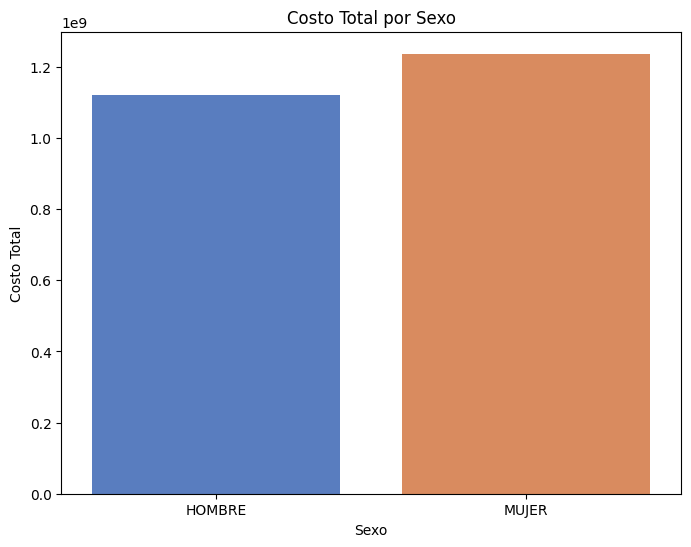

<ipython-input-19-1252a674dbcc>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SEXO', y='mean', data=df_agrupado_sexo, palette='muted')


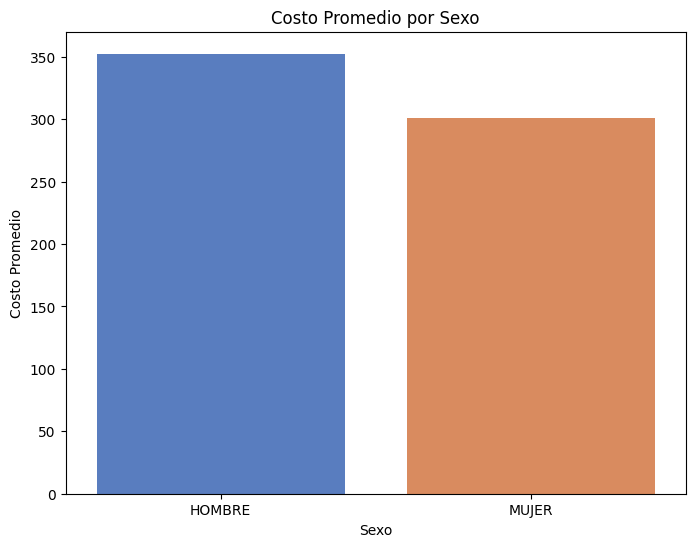

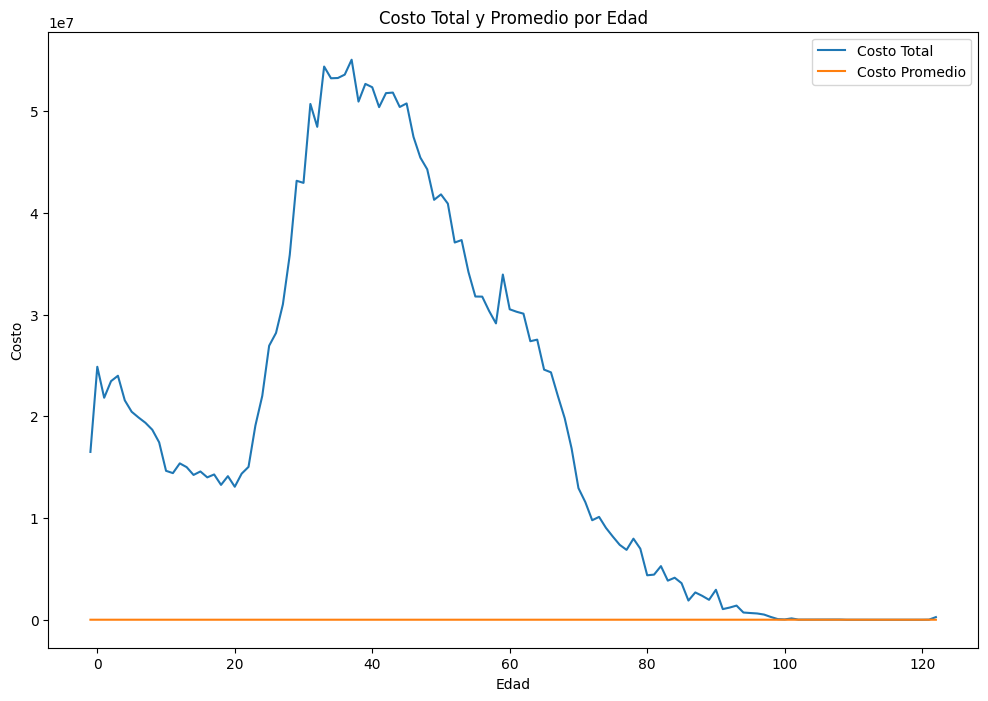

<ipython-input-19-1252a674dbcc>:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='EDAD', y='sum', hue='SEXO', data=df_agrupado_sexo_edad, ci=None, palette='muted')


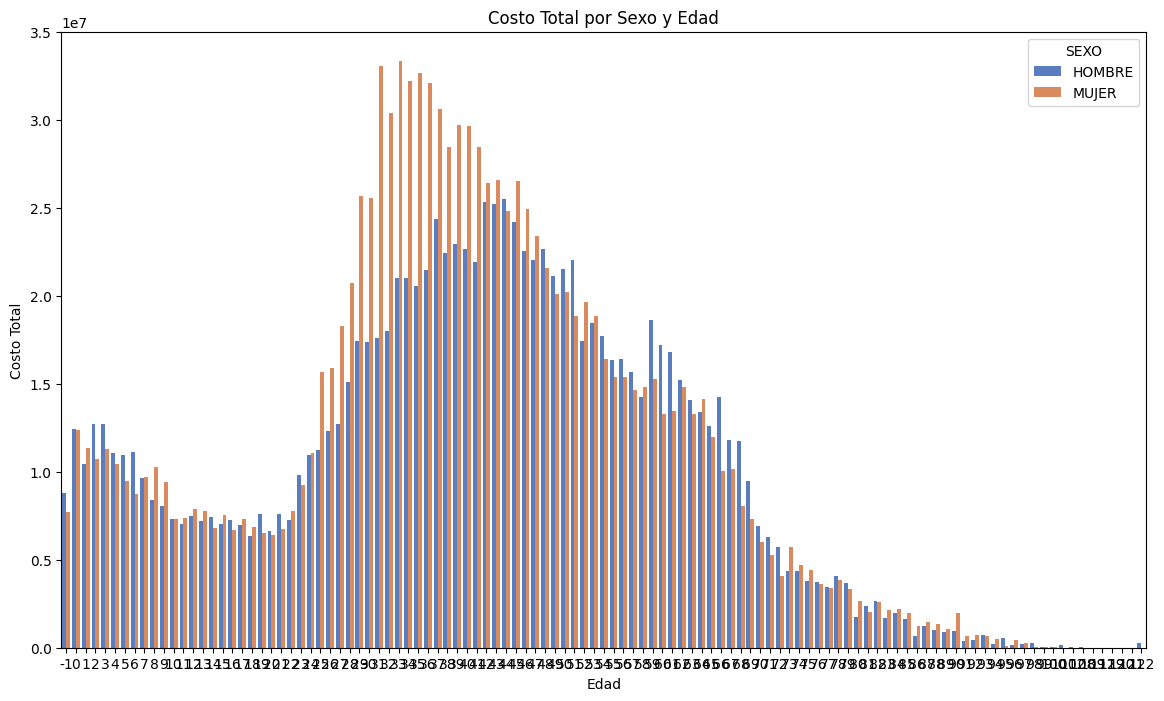

<ipython-input-19-1252a674dbcc>:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='EDAD', y='mean', hue='SEXO', data=df_agrupado_sexo_edad, ci=None, palette='muted')


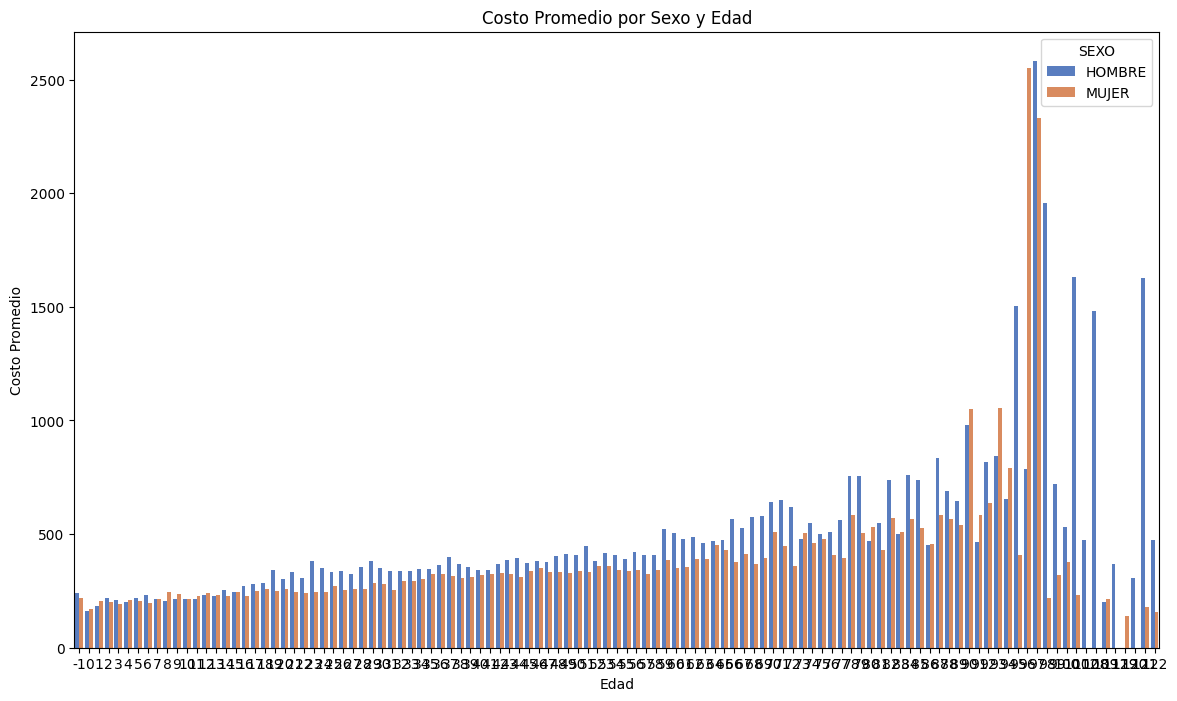

In [ ]:

# Supongamos que el dataframe se llama df
# Agrupación por sexo
df_agrupado_sexo = df.groupby('SEXO')['TOTAL_PAGADOSINIGV'].agg(['sum', 'mean']).reset_index()

# Agrupación por edad
df_agrupado_edad = df.groupby('EDAD')['TOTAL_PAGADOSINIGV'].agg(['sum', 'mean']).reset_index()

# Agrupación por sexo y edad
df_agrupado_sexo_edad = df.groupby(['SEXO', 'EDAD'])['TOTAL_PAGADOSINIGV'].agg(['sum', 'mean']).reset_index()

# Gráfico de barras por sexo - Costo Total
plt.figure(figsize=(8, 6))
sns.barplot(x='SEXO', y='sum', data=df_agrupado_sexo, palette='muted')
plt.title('Costo Total por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Costo Total')
plt.show()

# Gráfico de barras por sexo - Costo Promedio
plt.figure(figsize=(8, 6))
sns.barplot(x='SEXO', y='mean', data=df_agrupado_sexo, palette='muted')
plt.title('Costo Promedio por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Costo Promedio')
plt.show()

# Gráfico de líneas por edad (total y promedio)
plt.figure(figsize=(12, 8))
sns.lineplot(x='EDAD', y='sum', data=df_agrupado_edad, label='Costo Total')
sns.lineplot(x='EDAD', y='mean', data=df_agrupado_edad, label='Costo Promedio')
plt.title('Costo Total y Promedio por Edad')
plt.xlabel('Edad')
plt.ylabel('Costo')
plt.legend()
plt.show()

# Gráfico de barras apiladas por sexo y edad - Costo Total
plt.figure(figsize=(14, 8))
sns.barplot(x='EDAD', y='sum', hue='SEXO', data=df_agrupado_sexo_edad, ci=None, palette='muted')
plt.title('Costo Total por Sexo y Edad')
plt.xlabel('Edad')
plt.ylabel('Costo Total')
plt.legend(title='SEXO')
plt.show()

# Gráfico de barras apiladas por sexo y edad - Costo Promedio
plt.figure(figsize=(14, 8))
sns.barplot(x='EDAD', y='mean', hue='SEXO', data=df_agrupado_sexo_edad, ci=None, palette='muted')
plt.title('Costo Promedio por Sexo y Edad')
plt.xlabel('Edad')
plt.ylabel('Costo Promedio')
plt.legend(title='SEXO')
plt.show()



<ipython-input-23-215b1d18f489>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['Mes'] = df_2022['Fecha'].dt.to_period('M')


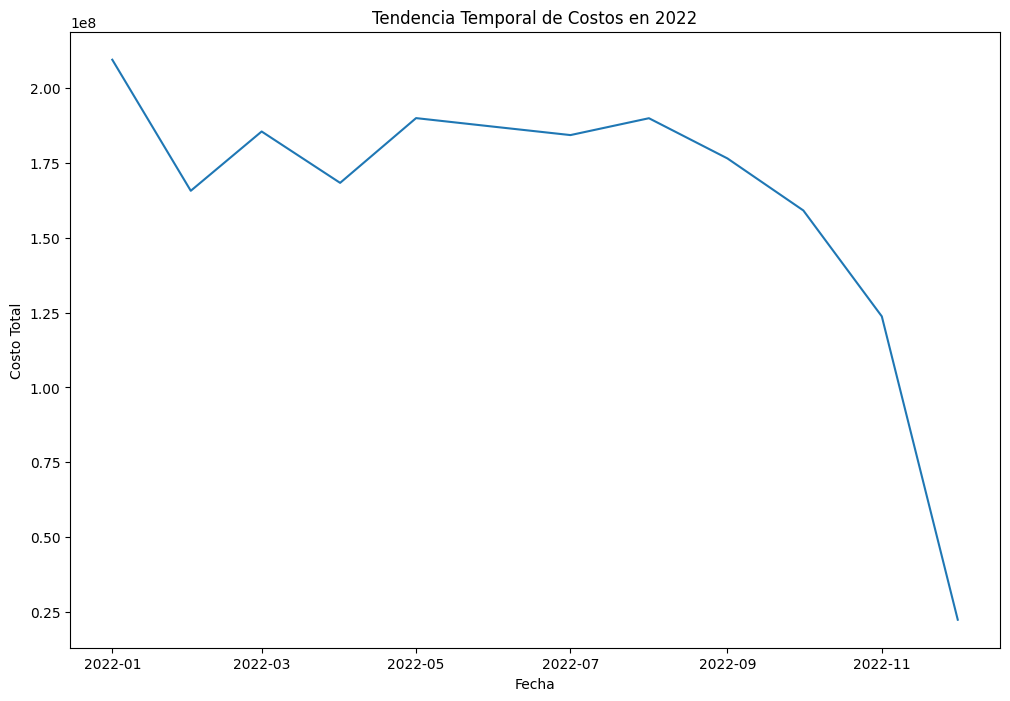

In [ ]:
# Convertir Fecha a datetime si aún no se ha hecho
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Filtrar los datos para incluir solo el año 2022
df_2022 = df[df['Fecha'].dt.year == 2022]

# Agrupar los datos por mes
df_2022['Mes'] = df_2022['Fecha'].dt.to_period('M')
df_agrupado_fecha_2022 = df_2022.groupby('Mes')['TOTAL_PAGADOSINIGV'].agg(['sum', 'mean']).reset_index()

# Convertir la columna 'Mes' de período a fecha para facilitar la visualización
df_agrupado_fecha_2022['Mes'] = df_agrupado_fecha_2022['Mes'].dt.to_timestamp()

# Gráfico de líneas por fecha
plt.figure(figsize=(12, 8))
sns.lineplot(x='Mes', y='sum', data=df_agrupado_fecha_2022)
plt.title('Tendencia Temporal de Costos en 2022')
plt.xlabel('Fecha')
plt.ylabel('Costo Total')
plt.show()


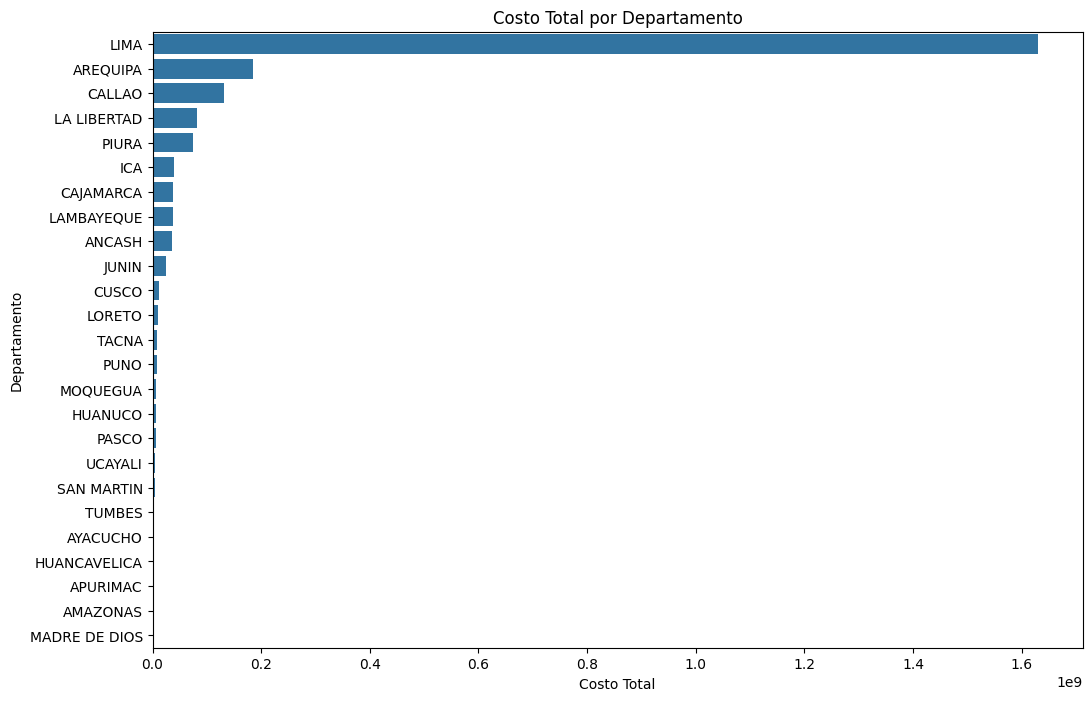

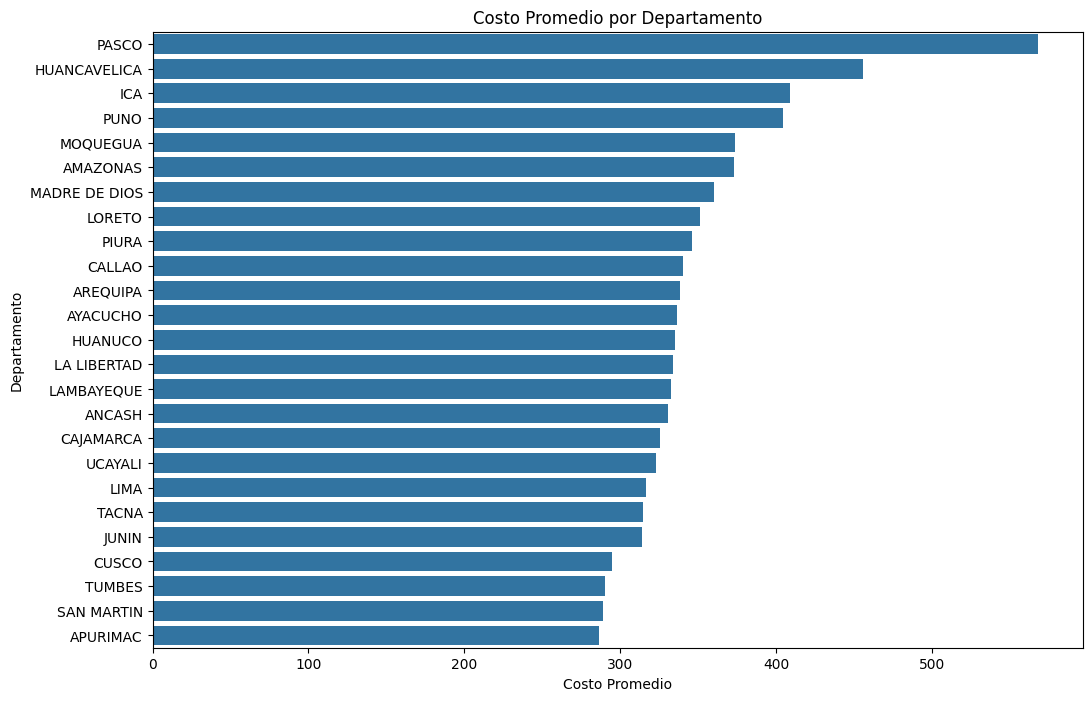

In [ ]:
# Gráfico de barras para costos totales por departamento
plt.figure(figsize=(12, 8))
sns.barplot(x='sum', y='DEP', data=df_agrupado_dep.sort_values('sum', ascending=False))
plt.title('Costo Total por Departamento')
plt.xlabel('Costo Total')
plt.ylabel('Departamento')
plt.show()

# Gráfico de barras para costos promedio por departamento
plt.figure(figsize=(12, 8))
sns.barplot(x='mean', y='DEP', data=df_agrupado_dep.sort_values('mean', ascending=False))
plt.title('Costo Promedio por Departamento')
plt.xlabel('Costo Promedio')
plt.ylabel('Departamento')
plt.show()


In [ ]:
# HEATMAP GASTO PROMEDIO DE ENFERMEDADES POR DEPARTAMENTO DIVIDO EN PROVINCIAS


from ipywidgets import interact, widgets

# Suponiendo que 'df' es el dataframe original
df['Fecha'] = pd.to_datetime(df['Fecha'])
df_agrupado = df.groupby(['DEP', 'PROV', 'GrupoEnfermedad'])['TOTAL_PAGADOSINIGV'].mean().reset_index() # VARIAR MEAN CON SUM


# Función para crear el heatmap basado en el departamento seleccionado
def crear_heatmap(departamento):
    df_filtrado = df_agrupado[df_agrupado['DEP'] == departamento]
    if df_filtrado.empty:
        print("No hay datos para el departamento seleccionado.")
        return
    # Pivotear los datos para el heatmap
    df_pivot = df_filtrado.pivot_table(index='PROV', columns='GrupoEnfermedad', values='TOTAL_PAGADOSINIGV', fill_value=0)

    plt.figure(figsize=(12, 8))
    sns.heatmap(df_pivot, annot=True, fmt='.1f', cmap='coolwarm')
    plt.title(f'Total Gastado por Provincia y Grupo de Enfermedad en {departamento}') # VARIAR ENTRE TOTAL Y PROMEDIO
    plt.xlabel('Grupo de Enfermedad')
    plt.ylabel('Provincia')
    plt.show()

# Widget de selección de departamento
departamentos = df['DEP'].unique()
departamento_selector = widgets.Dropdown(
    options=departamentos,
    description='Departamento:'
)

# Interacción
interact(crear_heatmap, departamento=departamento_selector)


interactive(children=(Dropdown(description='Departamento:', options=('LORETO', 'AREQUIPA', 'JUNIN', 'SAN MARTI…

<function __main__.crear_heatmap(departamento)>

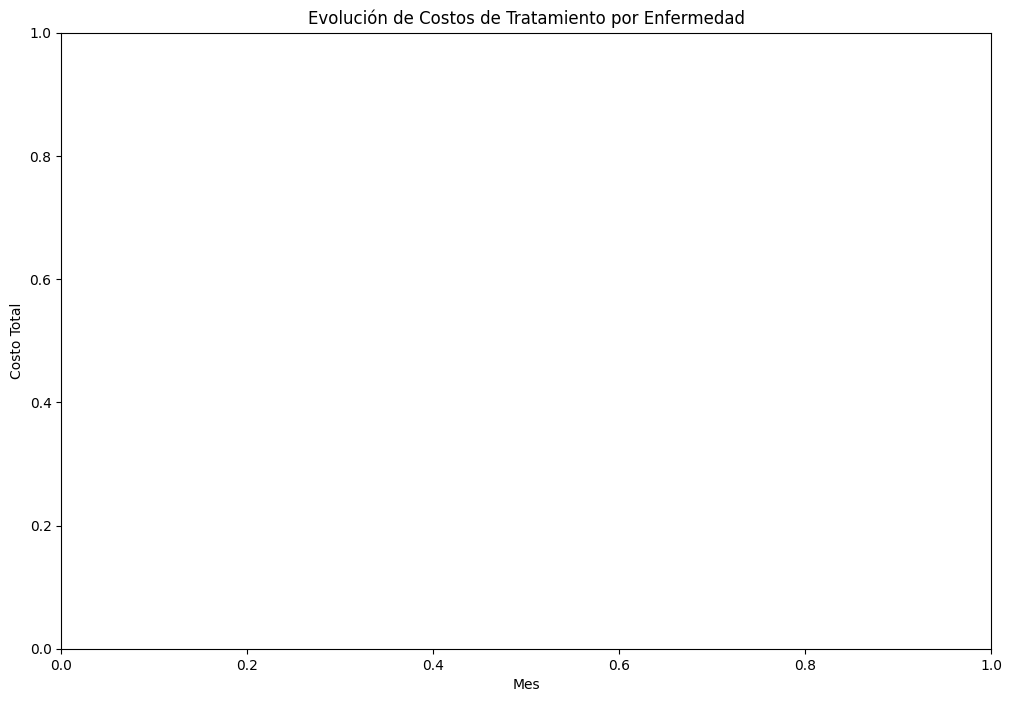

In [8]:
# Agrupación por mes y enfermedad
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Mes'] = df['Fecha'].dt.to_period('M')
df_agrupado_mes_enfermedad = df.groupby(['Mes', 'NOMBRECIE10'])['TOTAL_PAGADOSINIGV'].sum().reset_index()

# Filtrar enfermedades específicas
enfermedades = ['Diabetes', 'Ansiedad', 'Depresión']
df_filtrado = df_agrupado_mes_enfermedad[df_agrupado_mes_enfermedad['NOMBRECIE10'].isin(enfermedades)]

# Gráfico de líneas
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_filtrado, x='Mes', y='TOTAL_PAGADOSINIGV', hue='NOMBRECIE10')
plt.title('Evolución de Costos de Tratamiento por Enfermedad')
plt.xlabel('Mes')
plt.ylabel('Costo Total')
plt.show()


In [ ]:


# Suponiendo que ya tenemos el dataframe `df`

# Convertir variables categóricas a numéricas utilizando One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['SEXO', 'DEP', 'PROV', 'DIST', 'EPS', 'GrupoEnfermedad', 'NOMBRECIE10'])

# Convertir Fecha a datetime
df_encoded['Fecha'] = pd.to_datetime(df_encoded['Fecha'])

# Seleccionar sólo las columnas numéricas para la correlación
df_numeric = df_encoded.select_dtypes(include=['float64', 'int64', 'uint8'])

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Visualizar la matriz de correlación usando un heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Preparar los datos para clustering
df_clustering = df[['dni_anon', 'TOTAL_PAGADOSINIGV']].groupby('dni_anon').sum().reset_index()
kmeans = KMeans(n_clusters=4)
df_clustering['Cluster'] = kmeans.fit_predict(df_clustering[['TOTAL_PAGADOSINIGV']])

# Gráfico de dispersión por clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='dni_anon', y='TOTAL_PAGADOSINIGV', hue='Cluster', data=df_clustering)
plt.title('Segmentación de Clientes por Costos Médicos')
plt.xlabel('Cliente')
plt.ylabel('Costo Total')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7c4241538820> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7c4241527a30> (for post_execute):


KeyboardInterrupt: 